# Impact of WildFire Smoke

This analysis is a part of the Course Project for DATA512 at the University of Washington. Please refer to notebooks in the same repository to understand more about the data and the processes.

This script is designed to assess the health effects of smoke estimates in Farmington, NM. It achieves this by examining data related to fertility, mortality, and Medicare enrollees.

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Mortality & Medicare Enrollees data

Now we will be importing Mortality & MedicareEnrollees data for Farmington (1990-2019). The raw data from [Dartmouth Atlas Data Website](https://data.dartmouthatlas.org/mortality/#by-year) will be available in the **/ImpactAnalysisData** Folder as mulitple Excel files named like "_mortality_hsa".


This code is designed to process and analyze data from multiple Excel files (yearly) containing information about Medicare enrollees and mortality rates. Both the fields are columns in the same file. It reads required columns from each file, renames them for clarity, and filters the data to focus on entries related to 'NM-FARMINGTON'. The script also adds a 'Year' column based on the file's name. After processing each file, it combines all the filtered data into a single dataframe, allowing for a comprehensive analysis of the Medicare enrollees and mortality rates over different years in the specified region.

In [2]:
# Change the path of the directory
folder_path = 'C:/Users/adith/Documents/data-512-final-project/ImpactAnalysisData'

def process_excel_file(file_path, file_year):
    try:
        # Reading only the required columns from the Excel file
        df = pd.read_excel(file_path, usecols=[1, 2, 3])

        # Renaming columns for clarity if needed
        df.columns = ['City', 'MedicareEnrollees', 'MortalityRate']

        # Adding a 'Year' column based on the file name
        df['year'] = file_year

        # Cleaning the City name to match the filter
        df['City'] = df['City'].apply(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', x).strip().upper().strip())

        # Filtering for 'NM-FARMINGTON'
        filtered_df = df[df['City'].isin(['NMFARMINGTON', 'NM FARMINGTON'])]
        filtered_df = filtered_df[['year','MedicareEnrollees', 'MortalityRate']]
        return filtered_df
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

all_filtered_dfs = []

for file_name in os.listdir(folder_path):
    if '_mortality_hsa' in file_name:
        print(file_name)
        file_year = file_name[0:4]
        file_path = os.path.join(folder_path, file_name)
        filtered_df = process_excel_file(file_path, file_year)
        if filtered_df is not None:
            all_filtered_dfs.append(filtered_df)

# Concatenate all filtered dataframes into one dataframe
mortality_medicare_df = pd.concat(all_filtered_dfs, ignore_index=True) if all_filtered_dfs else pd.DataFrame()

# Displaying the concatenated dataframe
mortality_medicare_df

1999_mortality_hsa.xls
2000_mortality_hsa.xls
2001_mortality_hsa.xls
2002_mortality_hsa.xls
2003_mortality_hsa.xls
2004_mortality_hsa.xls
2005_mortality_hsa.xls
2006_mortality_hsa.xls
2007_mortality_hsa.xls
2008_mortality_hsa.xls
2009_mortality_hsa.xls
2010_mortality_hsa.xls
2011_mortality_hsa.xls
2012_mortality_hsa.xls
2013_mortality_hsa.xls
2014_mortality_hsa.xls
2015_mortality_hsa.xls
2016_mortality_hsa.xlsx
2017_mortality_hsa.xlsx
2018_mortality_hsa.xlsx
2019_mortality_hsa.xlsx


,year,MedicareEnrollees,MortalityRate
0,1999,8329,5.306285
1,2000,8581,5.244074
2,2001,8820,5.396111
3,2002,9049,5.316488
4,2003,9310,5.246738
5,2004,9622,4.814263
6,2005,9871,5.178813
7,2006,10084,5.117181
8,2007,10346,4.998973
9,2008,10741,5.083898


## Fertility Data

This snippet is tailored to extract and analyze fertility data for Farmington City, NM, spanning from 2010 to 2021, sourced from the [U.S. Census Bureau's website](https://data.census.gov/table/ACSST1Y2022.S1301). The data, manually filtered for the city, is stored in the **/ImpactAnalysisData** folder as separate Excel files for each year. The code automates the process of reading these files, which are named starting with 'ACSS'. It reads each file, specifically extracting the last row of the second column, which represents the fertility rate. Alongside this rate, the year is also extracted from the filename. This data is then compiled into a DataFrame with columns for 'FertilityRate' and 'year', converting the fertility rate to a float for numerical analysis. 

In [3]:
def extract_data_from_excel_files(folder_path):
    # List to hold the last row data from each file
    extracted_data = []

    # Iterate over files in the specified folder
    for file_name in os.listdir(folder_path):
        # Check if file name starts with 'ACSS'
        if file_name.startswith('ACSS'):
            print(file_name)
            # Construct the full file path
            file_path = os.path.join(folder_path, file_name)

            # Try to open the file as an Excel file and extract data
            try:
                # Read only the 'Data' sheet
                df = pd.read_excel(file_path, sheet_name='Data')
                
                # Extract the last row of the 2nd column
                last_row_data = df.iloc[-1, 1]

                # Extract the year from the file name
                year = file_name[7:11]

                # Append the data along with the year to the list
                extracted_data.append([last_row_data, year])
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

    # Convert the extracted data to a DataFrame
    result_df = pd.DataFrame(extracted_data, columns=['FertilityRate', 'year'])
    result_df['FertilityRate'] = result_df['FertilityRate'].str.replace('%', '').astype(float)


    return result_df

# Function Call
fertility_df = extract_data_from_excel_files(folder_path)
fertility_df

ACSST5Y2010.S1301-2023-11-29T043748.xlsx
ACSST5Y2011.S1301-2023-11-29T043744.xlsx
ACSST5Y2012.S1301-2023-11-29T043739.xlsx
ACSST5Y2013.S1301-2023-11-29T043733.xlsx
ACSST5Y2014.S1301-2023-11-29T043729.xlsx
ACSST5Y2015.S1301-2023-11-29T043719.xlsx
ACSST5Y2016.S1301-2023-11-29T043703.xlsx
ACSST5Y2017.S1301-2023-11-29T043657.xlsx
ACSST5Y2018.S1301-2023-11-29T043652.xlsx
ACSST5Y2019.S1301-2023-11-29T043644.xlsx
ACSST5Y2020.S1301-2023-11-29T043618.xlsx
ACSST5Y2021.S1301-2023-11-29T043613.xlsx


,FertilityRate,year
0,2.3,2010
1,3.0,2011
2,3.4,2012
3,5.5,2013
4,6.3,2014
5,6.9,2015
6,7.1,2016
7,7.8,2017
8,6.2,2018
9,5.5,2019


Now we will merge the above 2 dataframes: mortality_medicare_df and fertility_df, based on the 'year' column. The merge operation is performed using an 'outer' join, which ensures that all records from both dataframes are included in the final result. If a particular year is present in one dataframe but not in the other, the corresponding rows will still appear in the merged dataframe with missing values filled in the non-existent columns.

The final dataframe, features, contains a comprehensive set of data that combines mortality and Medicare enrollee information with fertility rates, all indexed by year. This dataset will be crucial for our impact analyses.

In [4]:
features = pd.merge(mortality_medicare_df,fertility_df,on='year', how = 'outer')
features['year'] = features['year'].astype(str)
features

,year,MedicareEnrollees,MortalityRate,FertilityRate
0,1999,8329,5.306285,NaN
1,2000,8581,5.244074,NaN
2,2001,8820,5.396111,NaN
3,2002,9049,5.316488,NaN
4,2003,9310,5.246738,NaN
5,2004,9622,4.814263,NaN
6,2005,9871,5.178813,NaN
7,2006,10084,5.117181,NaN
8,2007,10346,4.998973,NaN
9,2008,10741,5.083898,NaN


Next, we load the Annual Smoke Estimate (1.2_SmokeEstimateCalculation) & AQI dataset (1.3_AQI_Data) from the /intermediate folder, and merge them together on the Year column. Make sure to update the directory as required.

In [5]:
# Loading in the smoke estimates and AQI data
smoke_est = pd.read_csv('C:/Users/adith/Documents/data-512-final-project/intermediate/annual_smoke_estimate.csv')
aqi_est = pd.read_csv('C:/Users/adith/Documents/data-512-final-project/intermediate/yearly_aqi.csv')

smokeest_aqi = pd.merge(left = smoke_est, right = aqi_est, how = "inner", left_on = 'FireYear', right_on = 'year')
smokeest_aqi['year']=smokeest_aqi['year'].astype(str)
smokeest_aqi

,FireYear,SmokeEstimate,year,yearly_avg_aqi
0,1974,1.511972,1974,NaN
1,1975,1.478003,1975,NaN
2,1976,1.810838,1976,NaN
3,1977,2.208096,1977,NaN
4,1978,0.768359,1978,NaN
5,1979,2.167136,1979,NaN
6,1980,1.959832,1980,NaN
7,1981,3.032177,1981,NaN
8,1982,1.645685,1982,NaN
9,1983,2.945636,1983,NaN


Next, we merge the two DataFrames, smokeest_aqi and features, on the 'year' column. The merge is performed using a left join, ensuring that all rows from smokeest_aqi are included in the final DataFrame along with matching rows from features based on the 'year'.

After the merge, the DataFrame is restructured to include only the columns 'year', 'SmokeEstimate', 'yearly_avg_aqi', 'MedicareEnrollees', 'MortalityRate', and 'FertilityRate'. This selection of columns indicates that the final DataFrame is intended to analyze various health and environmental indicators, including smoke estimates, air quality, Medicare enrollees, mortality rates, and fertility rates, year by year.

This will be the dataset on which we do the impact analysis.

In [6]:
# Perform the merge
final_df = pd.merge(smokeest_aqi,features,on = 'year',how='left')
final_df = final_df[['year','SmokeEstimate','yearly_avg_aqi','MedicareEnrollees','MortalityRate','FertilityRate']]
final_df[['SmokeEstimate','yearly_avg_aqi','MedicareEnrollees','MortalityRate','FertilityRate']] = final_df[['SmokeEstimate','yearly_avg_aqi','MedicareEnrollees','MortalityRate','FertilityRate']].apply(pd.to_numeric)

# Writing the file back
final_df.to_csv('C:/Users/adith/Documents/data-512-final-project/intermediate/SmokeEstimate_Features.csv',index=False)

## Smoke Estimate vs Health Variable & AQI

From here, we will start understanding how the smoke affects the variables ('yearly_avg_aqi','MedicareEnrollees','MortalityRate','FertilityRate'). We will answer 3 important questions.

### Key Health Factors Impacted

### Correlation

To examine the associations between SmokeEstimates and various factors like AQI, MedicareEnrollees, Mortality Rate, and Fertility Rate, we will conduct a correlation analysis. This analysis will help in understanding how SmokeEstimates potentially relate to these different variables.

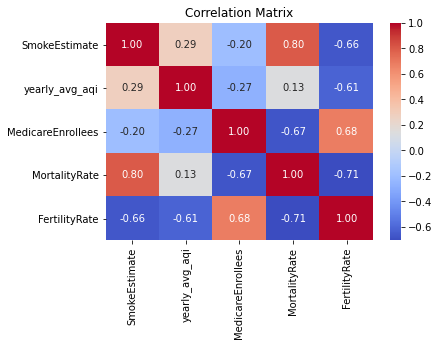

SmokeEstimate        1.000000
MortalityRate        0.801985
yearly_avg_aqi       0.286191
MedicareEnrollees   -0.197925
FertilityRate       -0.659865
Name: SmokeEstimate, dtype: float64

In [8]:
# Getting the correlation values
corr_matrix = final_df.corr()

# Plotting the adjusted correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Display the adjusted correlation values with SmokeEstimate specifically
corr_with_smoke = corr_matrix['SmokeEstimate'].sort_values(ascending=False)
corr_with_smoke

We observe a strong positive correlation (0.80) between 'SmokeEstimate' and 'MortalityRate', indicating a possible association where increased smoke estimates are linked with higher mortality rates. This significant correlation underscores the potential influence of smoke exposure on health outcomes. Conversely, there is a negative correlation (-0.66) between 'SmokeEstimate' and 'FertilityRate', suggesting that higher levels of smoke may correlate with reduced fertility rates. This inverse relationship highlights the potential detrimental impact of smoke on reproductive health. However, the correlations between AQI and MedicareEnrollees with other variables are relatively low, so we will exclude them from further analysis. It's important to remember that correlation does not imply causation.

### Lag Analysis

Having established that Smoke Estimates significantly influence both Mortality and Fertility Rates, our next step is to investigate whether these impacts occur immediately or manifest after a delay. To explore this, we will conduct a Lag Analysis, which will help us determine if the effects of smoke exposure on mortality and fertility rates are immediate or time-delayed. This analysis is crucial for understanding the temporal dynamics of smoke exposure's effects on these health outcomes.

In [9]:
# Calculating correlations for different time lags
max_lag = 10  # Maximum number of years to lag
correlation_results = {}

for lag in range(max_lag + 1):
    # Creating a lagged version of the SmokeEstimate
    lagged_smoke = final_df['SmokeEstimate'].shift(lag)

    # Calculating correlation with MortalityRate and FertilityRate
    corr_mortality = lagged_smoke.corr(final_df['MortalityRate'])
    corr_fertility = lagged_smoke.corr(final_df['FertilityRate'])

    # Storing the results
    correlation_results[lag] = {'MortalityRate': corr_mortality, 'FertilityRate': corr_fertility}

correlation_results_df = pd.DataFrame(correlation_results).T
correlation_results_df

,MortalityRate,FertilityRate
0,0.801985,-0.659865
1,-0.080179,-0.239979
2,-0.323467,0.390893
3,-0.128740,0.201009
4,-0.170621,-0.153845
5,-0.017739,-0.379966
6,0.217751,-0.284827
7,-0.323966,0.042035
8,-0.621439,0.319870
9,-0.088049,0.037827


Clearly, we observe a varied impact over lags of up to 10 years. However, the strongest correlations is seen at lag 0, indicating more pronounced immediate effects.

### Regression Analysis

The next analysis is particularly aimed at understanding current trends and potentially projecting the impact of smoke estimates on health outcomes in the future. We do this by performing and visualizing regression (Ordinary Least Squares) analysis, exploring the relationship between smoke estimates and Mortality & Fertility Rate.

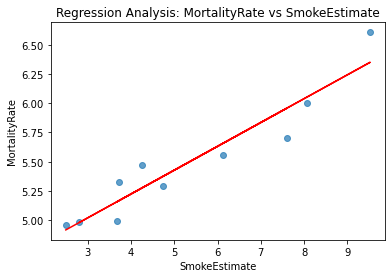

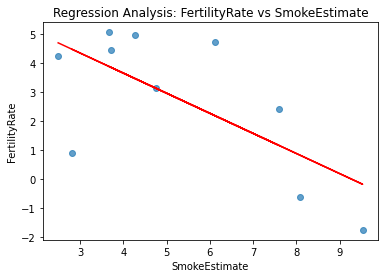

{'MortalityRate': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:          MortalityRate   R-squared:                       0.899
 Model:                            OLS   Adj. R-squared:                  0.886
 Method:                 Least Squares   F-statistic:                     70.83
 Date:                Sat, 09 Dec 2023   Prob (F-statistic):           3.03e-05
 Time:                        19:27:46   Log-Likelihood:                 4.3520
 No. Observations:                  10   AIC:                            -4.704
 Df Residuals:                       8   BIC:                            -4.099
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------

In [10]:
final_df = final_df.dropna()

# Function to perform regression analysis and plot results
def perform_regression_analysis(x, y, x_label, y_label):
    # Adding a constant to the predictor variable
    x_with_constant = sm.add_constant(x)

    # Performing Ordinary Least Squares (OLS) regression
    model = sm.OLS(y, x_with_constant).fit()

    # Plotting the scatter plot and the regression line
    plt.scatter(x, y, alpha=0.7)
    plt.plot(x, model.predict(x_with_constant), color='red')  # Regression line
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Regression Analysis: {y_label} vs {x_label}')

    plt.show()

    return model.summary()

# Performing regression analysis for each health-related feature against SmokeEstimate
feature_names = ['MortalityRate', 'FertilityRate']
regression_summaries = {}

for feature in feature_names:
    summary = perform_regression_analysis(final_df['SmokeEstimate'], final_df[feature], 'SmokeEstimate', feature)
    regression_summaries[feature] = summary

# Displaying the first regression summary as an example
regression_summaries#['yearly_avg_aqi']


### Regression Analysis Results

Mortality Rate Regression Analysis:

- R-squared (0.899): This indicates a very high proportion (approximately 89.9%) of the variance in MortalityRate is explained by the SmokeEstimate. This suggests a strong linear relationship.
- Coefficients:
    - Constant (4.4060): When SmokeEstimate is 0, the predicted MortalityRate is 4.4060.
    - SmokeEstimate (0.2042): For each unit increase in SmokeEstimate, MortalityRate increases by approximately 0.2042 units.
- Statistical Significance: The p-value (< 0.001) for the SmokeEstimate coefficient is significantly low, indicating a statistically significant relationship between SmokeEstimate and MortalityRate.
- Overall Model Fit: The model has a high R-squared value and significant coefficients, suggesting a strong and significant fit to the data.

Fertility Rate Regression Analysis
- R-squared (0.458): Around 45.8% of the variability in FertilityRate is explained by SmokeEstimate, which is a moderate correlation.
- Coefficients:
    - Constant (6.4325): The baseline level of FertilityRate when SmokeEstimate is 0.
    - SmokeEstimate (-0.6947): Indicates a negative relationship. For each unit increase in SmokeEstimate, FertilityRate decreases by approximately 0.6947 units.
- Statistical Significance:The p-value (0.032) for SmokeEstimate is below the typical alpha level of 0.05, suggesting that this negative relationship is statistically significant, albeit less strongly than for MortalityRate.
- Overall Model Fit: The model explains a moderate proportion of the variance in FertilityRate and the coefficients are statistically significant.

Conclusions
- Mortality Rate: The regression analysis suggests a strong and significant positive relationship between SmokeEstimate and MortalityRate. Higher smoke estimates are associated with higher mortality rates.
- Fertility Rate: There is a moderate, statistically significant negative relationship between SmokeEstimate and FertilityRate. Higher smoke estimates are associated with lower fertility rates.

These results provide valuable insights into the trends of the impact of smoke on key health outcomes, supporting the formulation of targeted public health policies and interventions.

## Conclusion

In summary, from the three analyses conducted:

- Correlation Analysis: We found a strong positive correlation between smoke estimates and mortality rates, suggesting that higher smoke exposure might lead to increased mortality rates. Conversely, a significant negative correlation between smoke estimates and fertility rates indicates that increased smoke exposure could be linked to lower fertility rates.

- Lag Analysis: The strongest impact of smoke on health indicators is observed immediately (lag 0), indicating that the effects of smoke exposure are more pronounced in the short term.

- Regression Analysis: The regression models show a strong and statistically significant relationship between higher smoke estimates and increased mortality rates. In contrast, a moderately negative, yet significant, relationship is observed between smoke estimates and fertility rates, suggesting that increased smoke exposure may negatively impact fertility. This gives us an idea about the future trends of the impact.

Overall, these analyses collectively suggest that smoke exposure has a significant, immediate, and potentially lasting impact on key health outcomes, highlighting the importance of addressing smoke exposure in public health initiatives.